In [1]:
%cd ~/team/gj/code

/opt/ml/team/gj/code


# Distribution

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import pickle
import yaml

from dataset import split_gt, load_sources, load_levels

plt.style.use('dark_background')

In [3]:
options = yaml.safe_load(open('/opt/ml/team/gj/code/configs/Default.yaml', 'r'))
sources = load_sources(options['data']['source_paths'])
levels = load_sources(options['data']['level_paths'])

In [4]:
source_to_name = {
    0: '출력물',
    1: '프린트',
}

level_to_name = {
    1: '초등',
    2: '중등',
    3: '고등',
    4: '대학',
    5: '대학 이상',
}

In [17]:
all_data = pickle.load(open('/opt/ml/team/gj/notebooks/save/satrn_cur_best_long', 'rb'))
wrong = all_data['wrong']
correct = all_data['correct']
len(wrong), len(correct)

(4827, 15173)

In [12]:
wrong[0]

{'id': 46438,
 'correct': False,
 'expected': 'P _ { f } = \\left( \\frac { T _ { f } } { T _ { i } } \\right) \\left( \\frac { V _ { i } } { V _ { f } } \\right) P _ { i } ',
 'sequence': 'P _ { f } = \\left( \\frac { T _ { f } } { T _ { i } } \\right) \\left( \\frac { V _ { i } } { V _ { f } } \\right) P _ { t } ',
 'level': tensor(3),
 'source': tensor(0),
 'path': '/opt/ml/input/data/train_dataset/images/train_46438.jpg',
 'ex_len': 45,
 'pred_len': 45}

In [20]:
def prepare_df(stuff, correct):
    for x in stuff:
        name = x['path'].split('/')[-1]
        x['correct'] = correct
        x['name'] = name
        x['level'] = int(levels[name])
        x['source'] = int(sources[name])
        x['len'] = len(x['expected'].split())
        x['pred_len'] = len(x['sequence'].split())
        image = Image.open(x['path'])
        w, h = image.size
        x['image_ratio'] = w / h
        
        

prepare_df(wrong, False)   
prepare_df(correct, True)

total = wrong + correct
df = pd.DataFrame(total)
df = df.reindex(['name', 'correct', 'sequence', 'expected', 'level', 'source', 'path', 'len', 'pred_len',
                'image_ratio'], axis=1)
df

,name,correct,sequence,expected,level,source,path,len,pred_len,image_ratio
0,train_46438.jpg,False,P _ { f } = \left( \frac { T _ { f } } { T _ {...,P _ { f } = \left( \frac { T _ { f } } { T _ {...,4,0,/opt/ml/input/data/train_dataset/images/train_...,45,45,3.876923
1,train_55772.jpg,False,1 1 1 \times 5,| 1 1 \times 5,1,1,/opt/ml/input/data/train_dataset/images/train_...,5,5,4.358586
2,train_48207.jpg,False,+ 5 x + 4 x ^ { 2 } +,+ 5 x + 4 x ^ { 2 },2,1,/opt/ml/input/data/train_dataset/images/train_...,10,11,4.238806
3,train_42284.jpg,False,\overline { B P } = \left| \overline { P A } = 1,\overline { B P } = 1 \overline { P A } = 1,2,1,/opt/ml/input/data/train_dataset/images/train_...,14,14,4.343284
4,train_30371.jpg,False,"f \left( x , s \right) \left\{ \begin{matrix} ...","f \left( x , y \right) = \left\{ \begin{matrix...",3,1,/opt/ml/input/data/train_dataset/images/train_...,61,61,3.777202
...,...,...,...,...,...,...,...,...,...,...
19995,train_81750.jpg,True,\cos \theta = \frac { \sqrt { 3 } } { 2 },\cos \theta = \frac { \sqrt { 3 } } { 2 },3,1,/opt/ml/input/data/train_dataset/images/train_...,13,13,2.668539
19996,train_40368.jpg,True,\left( x - 2 \right) ^ { 2 } = 0,\left( x - 2 \right) ^ { 2 } = 0,1,0,/opt/ml/input/data/train_dataset/images/train_...,11,11,3.133333
19997,train_52478.jpg,True,"\tan \theta = \frac { y } { x } ,","\tan \theta = \frac { y } { x } ,",2,0,/opt/ml/input/data/train_dataset/images/train_...,11,11,3.000000
19998,train_97432.jpg,True,A \subset B,A \subset B,3,1,/opt/ml/input/data/train_dataset/images/train_...,3,3,2.769231


In [21]:
source_to_name, level_to_name

({0: '출력물', 1: '프린트'}, {1: '초등', 2: '중등', 3: '고등', 4: '대학', 5: '대학 이상'})

In [22]:
group_correct = df.groupby('correct')
group_correct.mean()

,level,source,len,pred_len,image_ratio
correct,,,,,
False,2.732132,0.562461,27.897245,27.737932,4.698595
True,2.283925,0.480129,14.315099,14.315099,4.233701


In [23]:
group_by_level_source = df.groupby(['level', 'source'])
group_by_level_source.mean()

correct        len   pred_len  image_ratio
level source                                             
1     0       0.846667  14.654667  14.604000     4.480046
      1       0.908765  12.046643  12.060994     4.299995
2     0       0.827965  17.026788  16.962992     4.665510
      1       0.806940  13.741548  13.673043     4.129769
3     0       0.713048  22.757986  22.524635     4.804547
      1       0.661100  19.680855  19.752138     3.969601
4     0       0.623345  23.640193  23.434416     4.335412
      1       0.507295  17.593715  17.720539     3.801549
5     0       0.622807  22.201754  21.728070     3.513188

In [24]:
group_by_level_source_correct = df.groupby(['level', 'source', 'correct'])
group_by_level_source_correct.mean()

len   pred_len  image_ratio
level source correct                                   
1     0      False    24.600000  24.269565     5.255414
             True     12.853543  12.853543     4.339626
      1      False    17.269663  17.426966     4.105676
             True     11.522279  11.522279     4.319503
2     0      False    27.121512  26.750675     5.598456
             True     14.929306  14.929306     4.471663
      1      False    18.539171  18.184332     3.979552
             True     12.593716  12.593716     4.165708
3     0      False    37.918868  37.105660     5.796675
             True     16.656796  16.656796     4.405285
      1      False    28.545673  28.756010     4.156500
             True     15.136476  15.136476     3.873790
4     0      False    36.012780  35.466454     4.878623
             True     16.164093  16.164093     4.007178
      1      False    22.881549  23.138952     3.819801
             True     12.457965  12.457965     3.783823
5     0      False    38.720930  37.465116     4.776072
             True     12.197183  12.197183     2.748343

In [25]:
group_by_level_source_correct = df.groupby(['correct'])
group_by_level_source_correct.mean()

,level,source,len,pred_len,image_ratio
correct,,,,,
False,2.732132,0.562461,27.897245,27.737932,4.698595
True,2.283925,0.480129,14.315099,14.315099,4.233701


In [21]:
df[df.correct == False].loc[:, ['sequence', 'expected', 'level', 'source']]

,sequence,expected,level,source
0,4 m 6 0 c m - 1 m 5 m 5 m = m m m m m,4 m 6 0 c m - 1 m 5 0 c m = 3 m 1 0 c m,1,0
1,P - 3 Q Q = \left( 5 x ^ { 2 } y + 2 y + 2 y ^...,P - 3 Q = \left( 5 x ^ { 2 } y + 2 y ^ { 2 } +...,1,0
2,\cos \left( - \beta \right) + \cos \alpha \cos...,\cos \left( - \beta \right) + \cos \alpha \sin...,2,0
3,{ } _ { n } _ { 0 } _ { } } { } { } { } { } { ...,{ } _ { n } C _ { 0 } \times { } _ { n } C _ {...,2,0
4,a _ { a } = a _ { 1 } + \left( n - 1 \right) d...,a _ { n } = a _ { 1 } + \left( n - 1 \right) d...,2,0
...,...,...,...,...
8583,\forall \alpha \in I R,\forall \alpha \in { I R },4,1
8584,P _ { c } = 8 0 m,\rho _ { c } = 8 0 m,4,1
8585,\left( u _ { E } \right) \left( \left( \left( ...,"u _ { s } \left( y ^ { r } \left( s , j s \rig...",4,1
8586,F \left( s \right) = \frac { 1 } { s ^ { 2 } +...,F \left( s \right) = \frac { 1 } { s ^ { 2 } +...,4,1


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


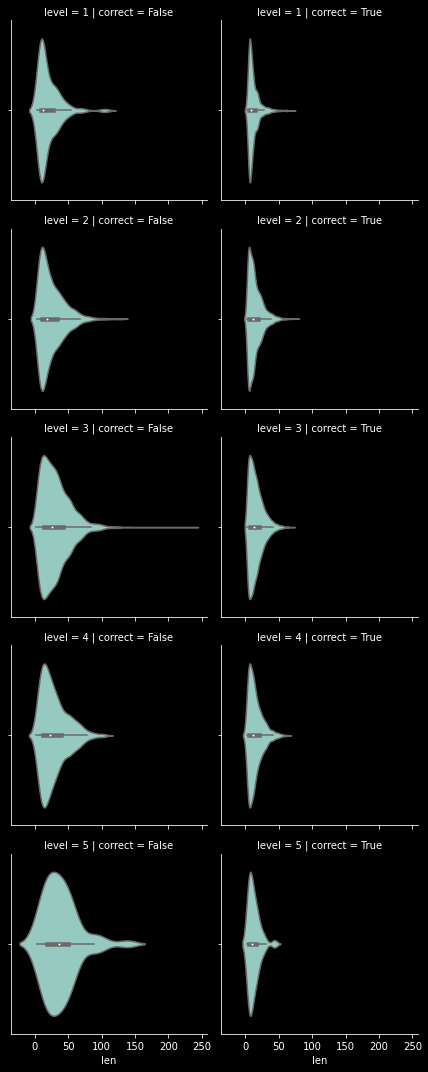

In [26]:
g = sns.FacetGrid(df, row='level', col='correct')
g.map(sns.violinplot, 'len')
plt.show()

In [23]:
def print_latex(latex):
    box1 = {'boxstyle': 'round',
    'ec': (0.5, 0.3, 0.3), # edgecolor
    'fc': (0.5, 0.8, 0.8)} # facecolor
    

    ax = plt.axes([0,0,0.2,0.2]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.3,0.5,'$%s$' %
             latex,size=20, bbox=box1)
    plt.show()

In [24]:
index = 0
group = df.groupby(['level', 'source'])
check = group.get_group((1, 0))
check = check[check.correct == True]

level: 초등
source: 출력물
4 x + 4 y = 8 0


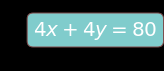

4 x + 4 y = 8 0


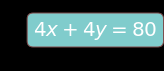

In [25]:
cur = check.iloc[index]

print(f'level: {level_to_name[cur.level]}')
print(f'source: {source_to_name[cur.source]}')

print(cur.expected)
print_latex(cur.expected)

print(cur.sequence)
try:
    print_latex(cur.sequence)
except ValueError:
    pass
except IndexError:
    pass


index += 1

In [168]:
!ls /opt/ml/input/data/saving_model

log			  satrn_curr		       satrn_new_baseline_test
satrn			  satrn_curr_diff_lrs	       satrn_reverse
satrn_adaptive_2d	  satrn_curr_longer_test       satrn_stn
satrn_adaptive_locality   satrn_extra_pb	       satrn_stn_test
satrn_basic		  satrn_flex_local_aware_long  satrn_test
satrn_criterion		  satrn_flexible_size	       satrn_tf_scheduler
satrn_criterion_test	  satrn_locality_aware	       satrn_tube
satrn_cur_best_long	  satrn_model_save	       satrn_tube_enc
satrn_cur_best_long_test  satrn_new_baseline	       satrn_tube_test


In [169]:
import torch
from checkpoint import load_checkpoint
from flags import Flags
import random
from torchvision import transforms
import utils
from utils import get_network
from dataset import LoadDataset, SizeBatchSampler, collate_batch, PAD
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from train_method import id_to_string

from torch.cuda.amp import (
    GradScaler, 
    autocast,
)

In [170]:
checkpoint = "/opt/ml/input/data/saving_model/satrn_reverse/checkpoints/best.pth"

In [171]:
is_cuda = torch.cuda.is_available()
checkpoint = load_checkpoint(checkpoint, cuda=is_cuda)
options, _ = Flags(checkpoint["configs"]).get()
torch.manual_seed(options.seed)
random.seed(options.seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [174]:
def get_dataset(paths):
    data = []
    for i, path in enumerate(paths):
        data_from_file = split_gt(path)
        data += data_from_file
        print(f'From {path}')
        print(f'Val +:\t{len(data_from_file)}')
    return data

valid_dataset = get_dataset(options.data.test)
len(valid_dataset)

From /opt/ml/input/data/train_dataset/test_gt_s:0_l:1.txt
Val +:	750
From /opt/ml/input/data/train_dataset/test_gt_s:0_l:2.txt
Val +:	6458
From /opt/ml/input/data/train_dataset/test_gt_s:0_l:3.txt
Val +:	1847
From /opt/ml/input/data/train_dataset/test_gt_s:0_l:4.txt
Val +:	831
From /opt/ml/input/data/train_dataset/test_gt_s:0_l:5.txt
Val +:	114
From /opt/ml/input/data/train_dataset/test_gt_s:1_l:1.txt
Val +:	1951
From /opt/ml/input/data/train_dataset/test_gt_s:1_l:2.txt
Val +:	2248
From /opt/ml/input/data/train_dataset/test_gt_s:1_l:3.txt
Val +:	4910
From /opt/ml/input/data/train_dataset/test_gt_s:1_l:4.txt
Val +:	891


20000

In [175]:
hardware = "cuda" if is_cuda else "cpu"
device = torch.device(hardware)
print("--------------------------------")
print("Running {} on device {}\n".format(options.network, device))

model_checkpoint = checkpoint["model"]
if model_checkpoint:
    print(
        "[+] Checkpoint\n",
        "Resuming from epoch : {}\n".format(checkpoint["epoch"]),
    )


if options.data.flexible_image_size:
    transformed = transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    )
else:
    transformed = transforms.Compose(
        [
            transforms.Resize((options.input_size.height, options.input_size.width)),
            transforms.ToTensor(),
        ]
    )

# random.shuffle(wrong_data)
# random.shuffle(correct_data)
# data = wrong_data[:1]
# data = correct_data[:1]
valid_dataset = LoadDataset(
    valid_dataset, options.data.token_paths, sources=sources,
    levels=levels, crop=options.data.crop,
    transform=transformed, rgb=options.data.rgb,
    max_resolution=options.input_size.height * options.input_size.width,
    is_flexible=options.data.flexible_image_size,
    is_reverse=options.data.is_reverse,
)

valid_sampler = SizeBatchSampler(valid_dataset, 16, is_random=True)
valid_data_loader = DataLoader(
    valid_dataset,
    batch_sampler=valid_sampler,
    num_workers=2,
    collate_fn=collate_batch,
)

--------------------------------
Running SATRN on device cuda

[+] Checkpoint
 Resuming from epoch : 10



  0%|          | 0/20000 [00:00<?, ?it/s]

In [177]:
model = get_network(
    options.network,
    options,
    model_checkpoint,
    device,
    valid_dataset,
)
model.eval()
print()

In [178]:
train = False
data_loader = valid_data_loader
use_amp=options.use_amp and device.type == 'cuda'
epoch_text = ''
teacher_forcing_ratio = 0
    
# Disables autograd during validation mode
torch.set_grad_enabled(False)

model.eval()

idx = 0
with tqdm(
    desc="{} ({})".format(epoch_text, "Train" if train else "Validation"),
    total=len(data_loader.dataset),
    dynamic_ncols=True,
    leave=False,
) as pbar:
    for d in data_loader:
        input = d["image"].to(device)

        # The last batch may not be a full batch
        curr_batch_size = len(input)
        expected = d["truth"]["encoded"].to(device)
        levels_expected = d['level'].to(device)
        sources_expected = d['source'].to(device)

        # Replace -1 with the PAD token
        expected[expected == -1] = data_loader.dataset.token_to_id[PAD]

        with autocast(enabled=use_amp):
            outputs_dict= model(input, expected, train, teacher_forcing_ratio, return_attn=True)
            output = outputs_dict['out']
            decoded_values = output.transpose(1, 2)
            _, sequence = torch.topk(decoded_values, 1, dim=1)
            sequence = sequence.squeeze(1)

        pbar.update(curr_batch_size)

expected = id_to_string(expected, data_loader)
sequence = id_to_string(sequence, data_loader)
    
print('done')

 (Validation):   0%|          | 0/20000 [00:00<?, ?it/s]

torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 240, 240])
torch.Size([16, 8, 1, 1])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 1])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 1])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 2])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 2])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 2])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 3])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 3])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 3])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 4])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 4])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 4])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 5])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 5])
torch.Size([16, 8, 1, 240])
torch.Size([16, 8, 1, 5])
torch.Size([16, 8, 1, 240])
torch.Size

KeyboardInterrupt: 

In [166]:
print(e[6:])
print(s)

\angle { B A D } = \angle { D C E } <EOS> 
\angle B A D = \angle D D C E <EOS> <EOS> <EOS> <EOS> 


In [163]:
idx = 0
o = outputs_dict['out'][idx]
er = outputs_dict['enc_result'][idx]
at1 = outputs_dict['attns_1']
at2 = outputs_dict['attns_2']
im = d['image'][idx]
e = expected[idx]
s = sequence[idx]

h, w, _ = er.shape
cat1 = [x.squeeze(0).squeeze(1) for x in at1]
cat2 = [x.squeeze(0).squeeze(1).reshape(-1, h, w).sum(0) for x in at2]

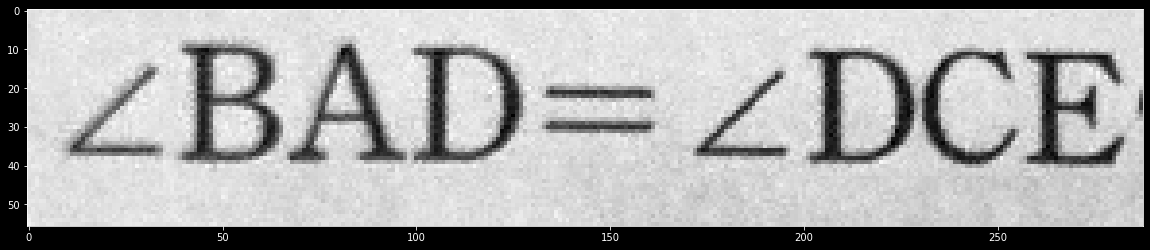

In [164]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(im.squeeze(0), cmap='gray')
plt.show()

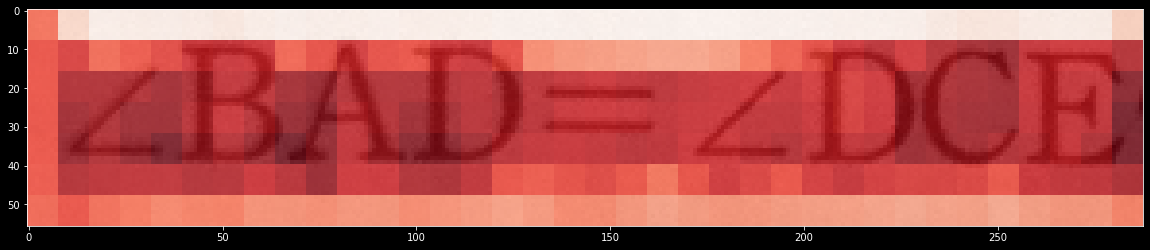

In [165]:
ser = er.sum(-1)
ser = (ser - ser.min()) / (ser.max() - ser.min())
ser = ser.repeat(8, 0).repeat(8, 1)

fig = plt.figure(figsize=(20, 20))
plt.imshow(im.squeeze(0), cmap='gray')
plt.imshow(ser, alpha=0.8, cmap='Reds')
plt.show()

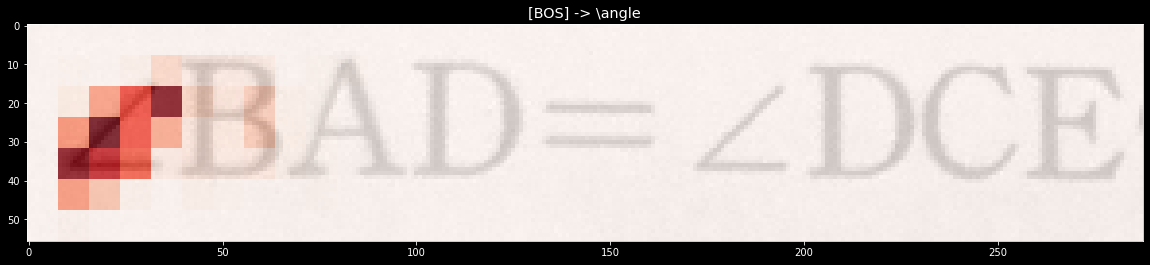

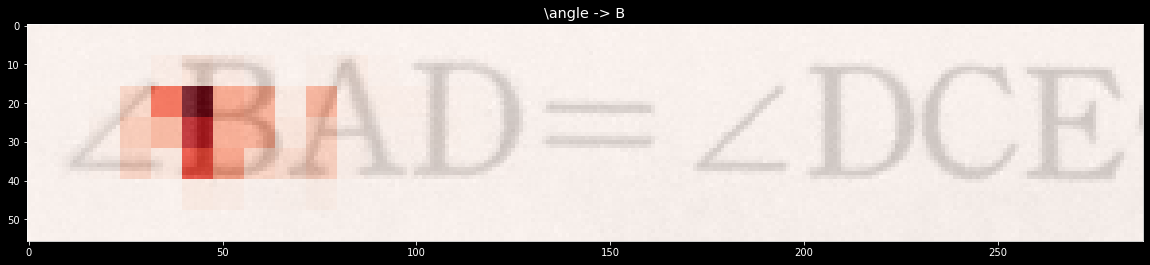

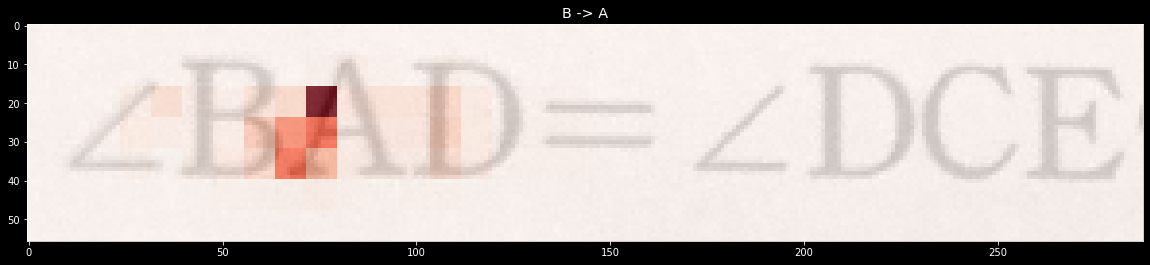

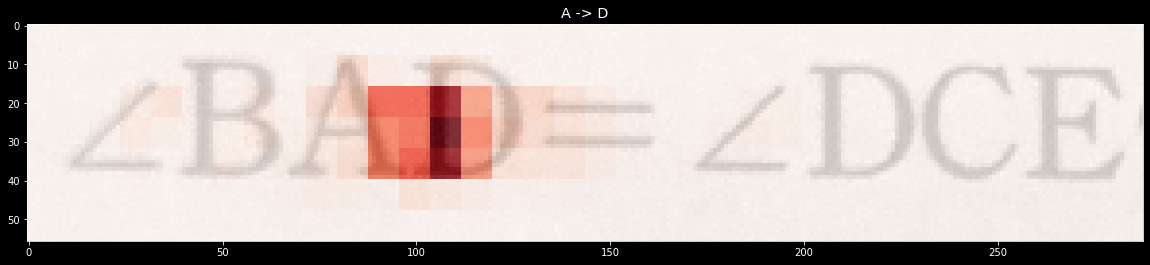

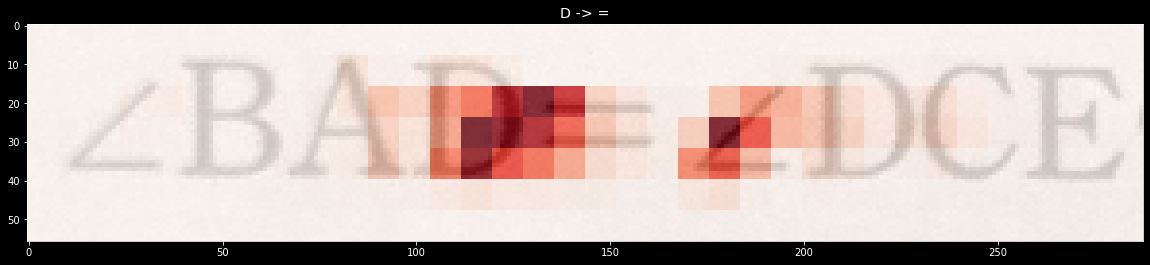

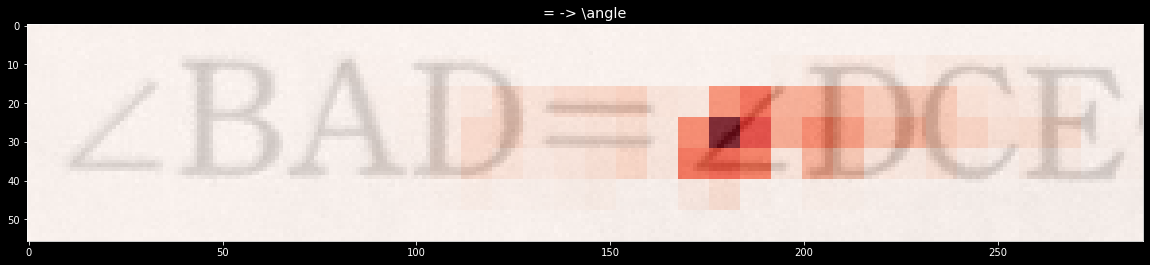

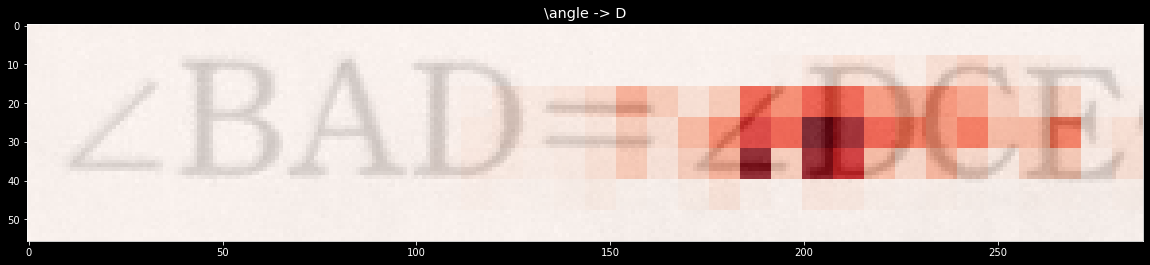

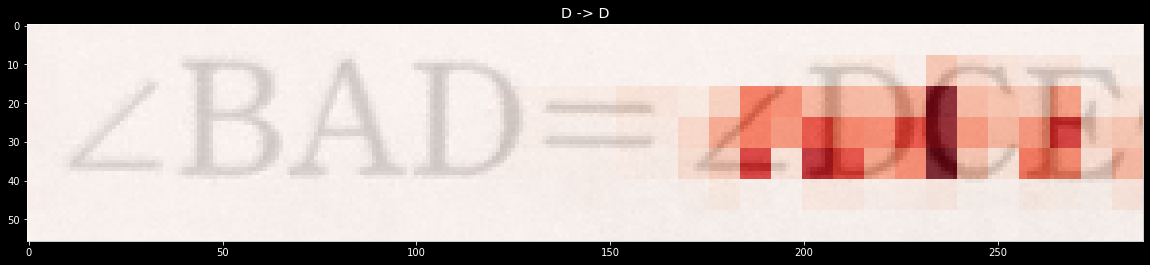

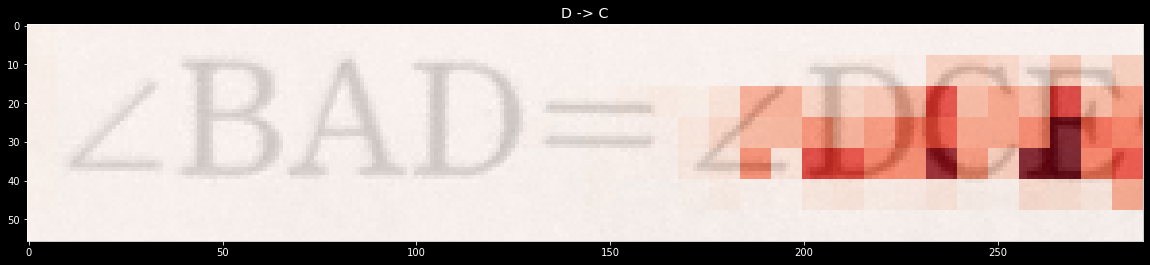

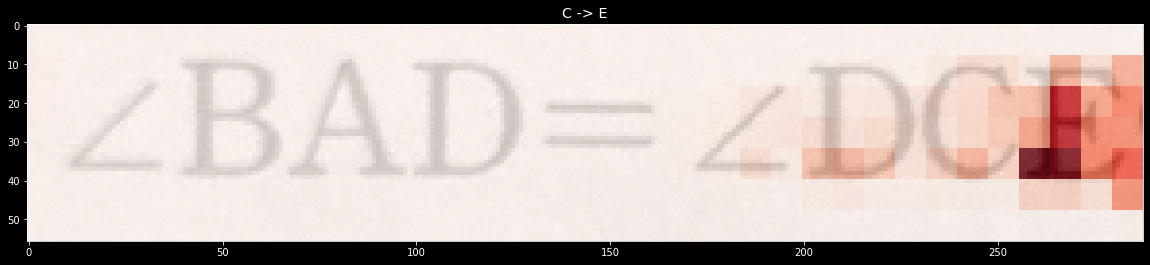

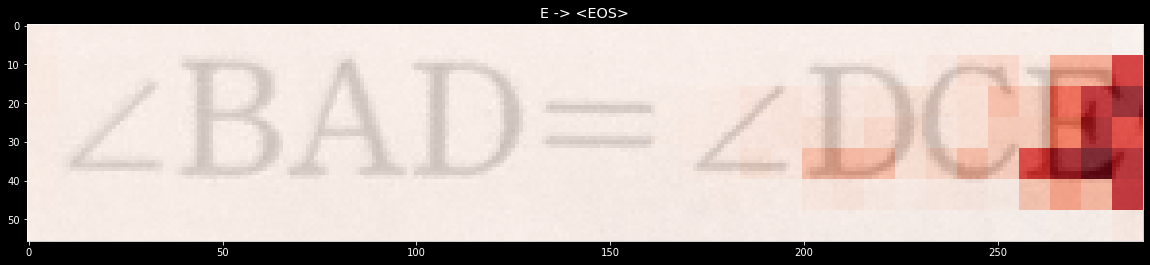

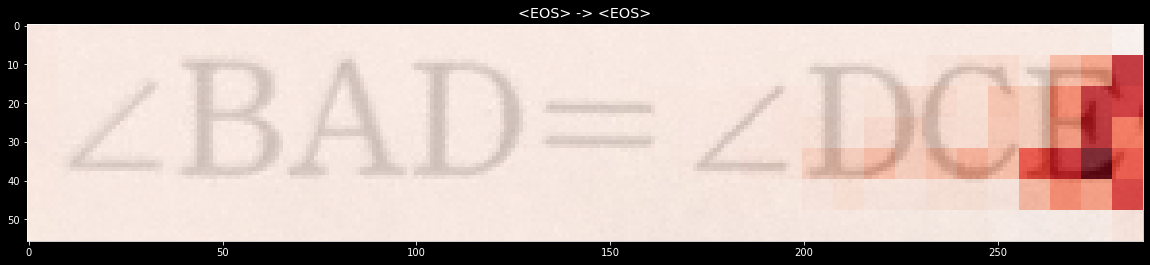

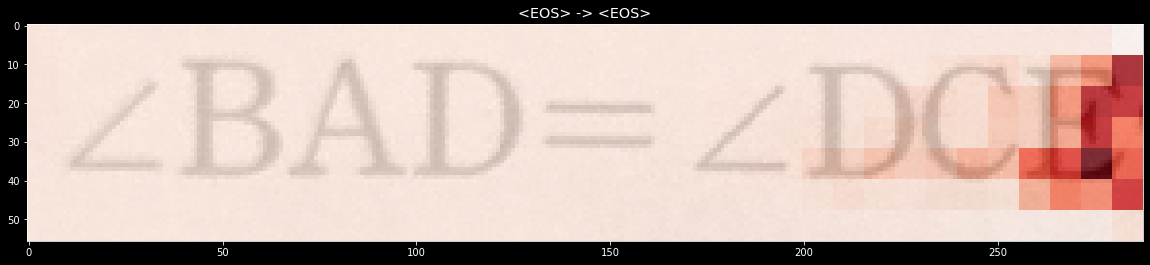

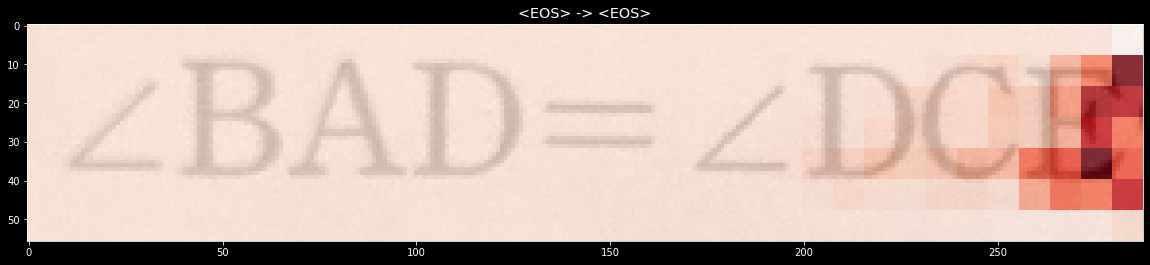

In [167]:
# ser = er.sum(-1)
# index = 0

# ser = (er * cat2[3*index+2][:, :, None])
# ser = ser.sum(-1)
# ser = (ser - ser.min()) / (ser.max() - ser.min())
# ser = ser.repeat(8, 0).repeat(8, 1)

# fig = plt.figure(figsize=(20, 20))

# plt.imshow(ser, alpha=0.8, cmap='Reds')
# plt.show()


latex = ['[BOS]'] + s.split()
for idx in range(len(latex)-1):
    st = idx

    fig = plt.figure(figsize=(20, 10))
    plt.imshow(im.squeeze(0), cmap='gray')

    j = 3 * st + 2
    ser = (er * cat2[j][:, :, None])
    ser = ser.sum(-1)
    ser = (ser - ser.min()) / (ser.max() - ser.min())
    ser = ser.repeat(8, 0).repeat(8, 1)

    plt.imshow(ser, alpha=0.8, cmap='Reds')
    
    if idx + 1 < len(latex):
        next_c = latex[idx + 1]
    else:
        next_c = 'FIN'
    
    plt.title(f'{latex[idx]} -> {next_c}', size='x-large')
    plt.show()
    print()
    

